In [22]:
import pandas as pd 
import matplotlib.pyplot as plt



# Load the cleaned dataset, parsing 'datetime' and setting it as the index
df = pd.read_csv(
    "D:/Data science/energy-forecasting-ml/data/processed/NESO_UK/cleaned_DemandData_2011-2018.csv",
    parse_dates=["datetime"],
    index_col="datetime"
)



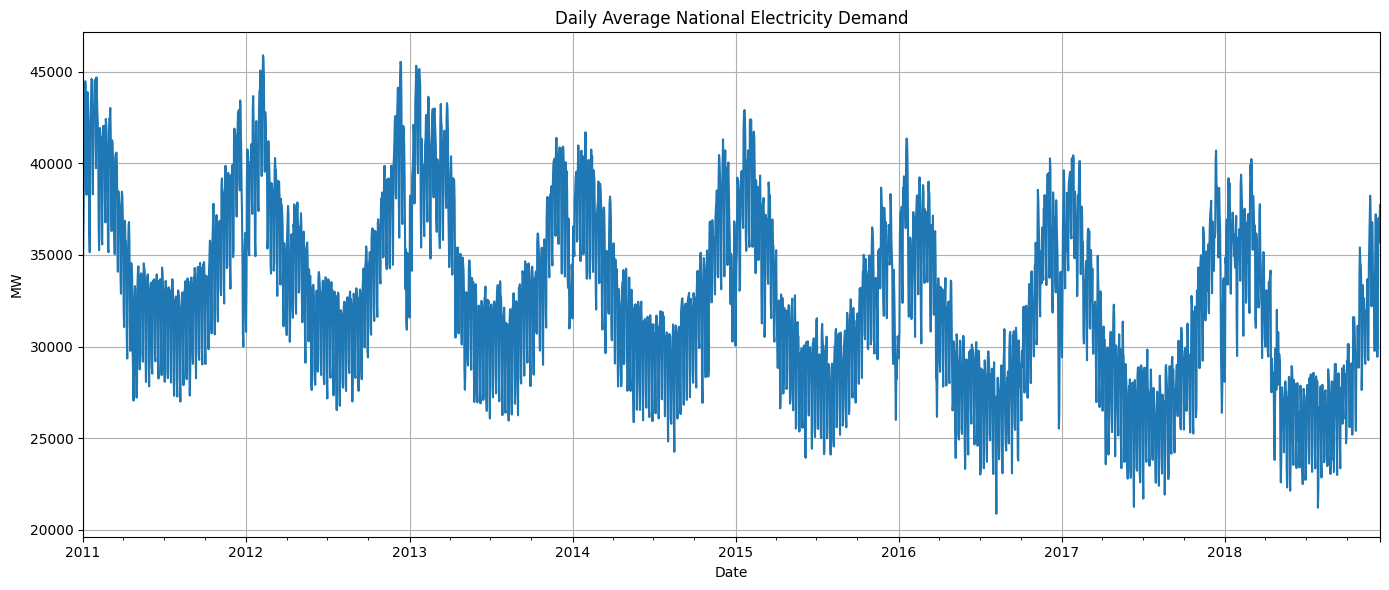

In [23]:
# Calculate the daily average national demand (ND)
# Resample to daily frequency and compute the mean for each day
daily_nd = df['ND'].resample('D').mean()

# Create the plot
plt.figure(figsize=(14, 6))             # Set the figure size (width x height)
daily_nd.plot()                         # Plot the daily average ND

plt.title("Daily Average National Electricity Demand")  # Chart title
plt.xlabel("Date")                                      # X-axis label
plt.ylabel("MW")                                        # Y-axis label (megawatts)


plt.grid(True)                  # Show grid lines
plt.tight_layout()              # Adjust layout to prevent label overlap

# Display the graph
plt.show()

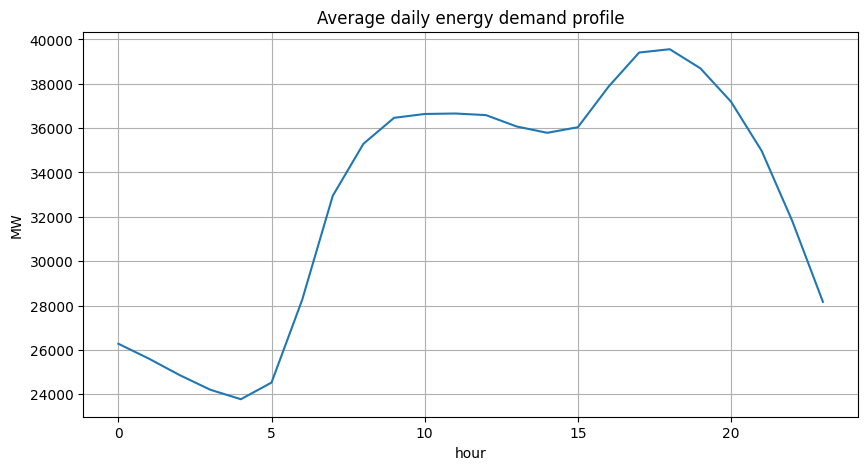

In [24]:

# Extract the hour of the day from the datetime index
df['hour'] = df.index.hour

# Group the data by hour (0 to 23) and calculate the average national demand (ND) for each hour
# This gives the average daily load profile across the entire dataset
df.groupby('hour')['ND'].mean().plot(kind='line', title='Average daily energy demand profile', figsize=(10,5))
plt.ylabel("MW")
plt.grid(True)
plt.show()


<Figure size 1400x600 with 0 Axes>

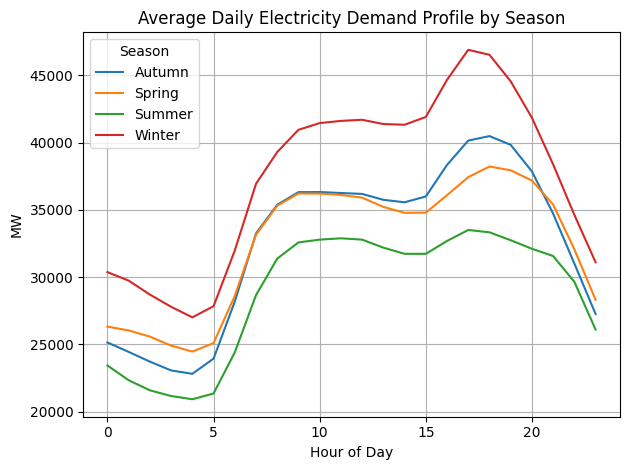

In [25]:



# Extract hour and month from datetime index
df["hour"] = df.index.hour
df["month"] = df.index.month

# Manually define the seasons based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

# Apply the function to assign a season to each row
df["season"] = df["month"].apply(get_season)

# Compute average electricity demand (ND) by hour and season
# Group by both 'season' and 'hour', then take the mean
grouped = df.groupby(['season', 'hour'])['ND'].mean().reset_index()

# Reshape the result into a pivot table for easy plotting
# Rows: hours of the day, Columns: seasons, Values: average ND
seasonal_profile = grouped.pivot(index='hour', columns='season', values='ND')


# Plot the seasonal load profiles
plt.figure(figsize=(14, 6))
seasonal_profile.plot()
plt.title("Average Daily Electricity Demand Profile by Season")
plt.xlabel("Hour of Day")
plt.ylabel("MW")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Season")
plt.show()


<Figure size 1200x600 with 0 Axes>

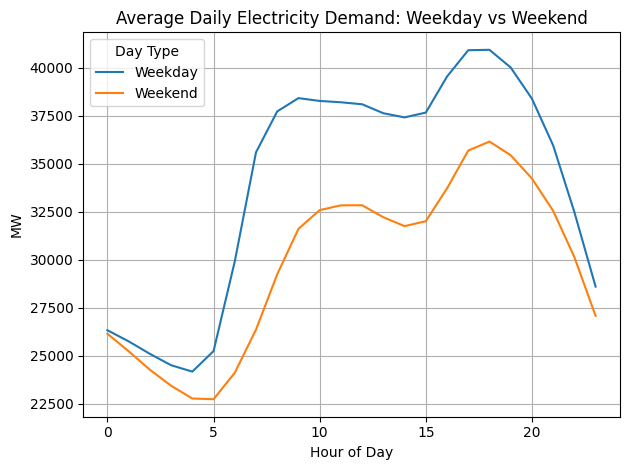

In [26]:
# Extract hour and weekday from the datetime index
df["hour"] = df.index.hour
df["weekday"] = df.index.weekday  # 0 = Monday, ..., 6 = Sunday

# Create a new column classifying each row as "Weekday" or "Weekend"
df["week_type"] = df["weekday"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

# Calculate the average national demand (ND) per hour for weekdays and weekends
# Group by both week_type and hour, then compute the mean
grouped = df.groupby(["week_type", "hour"])["ND"].mean().reset_index()

# Pivot the grouped data: rows = hours, columns = week types, values = average ND
profile_week = grouped.pivot(index='hour', columns='week_type', values='ND')


# Plot the hourly demand profile for weekdays vs. weekends
plt.figure(figsize=(12, 6))
profile_week.plot()
plt.title("Average Daily Electricity Demand: Weekday vs Weekend")
plt.xlabel("Hour of Day")
plt.ylabel("MW")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Day Type")
plt.show()

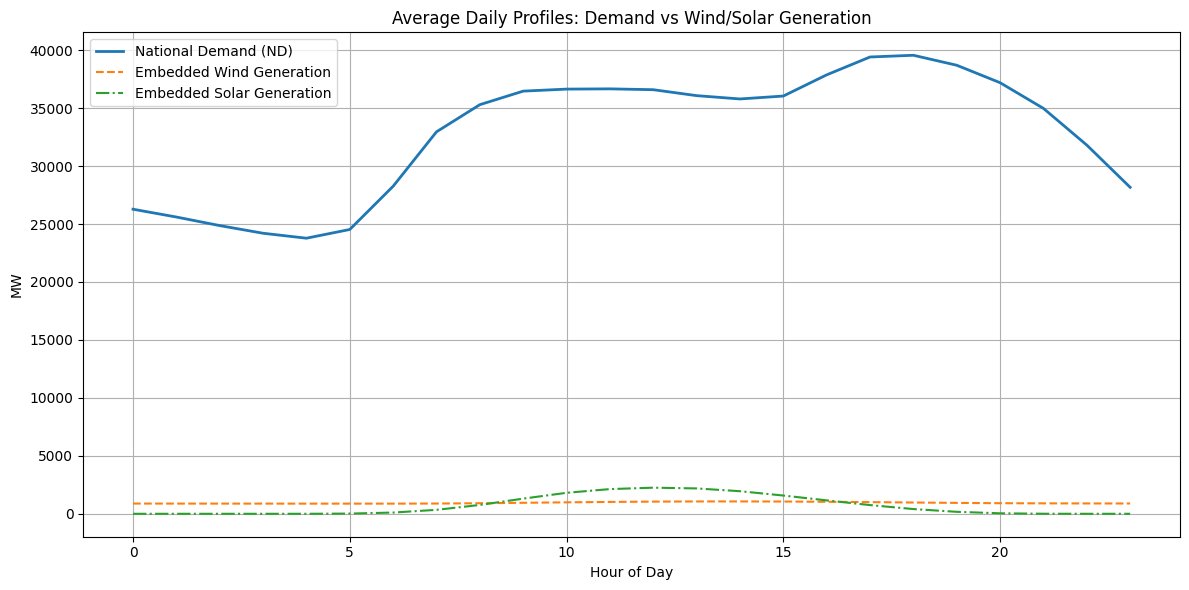

In [27]:

# Extract the hour of the day from the datetime index
df['hour'] = df.index.hour


# Group by hour and calculate the average for key variables
# Includes National Demand (ND), Embedded Wind, and Embedded Solar generation
hourly_profile = df.groupby('hour')[['ND', 'EMBEDDED_WIND_GENERATION', 'EMBEDDED_SOLAR_GENERATION']].mean()

# Plot the daily average profiles
plt.figure(figsize=(12, 6))
plt.plot(hourly_profile.index, hourly_profile['ND'], label='National Demand (ND)', linewidth=2)
plt.plot(hourly_profile.index, hourly_profile['EMBEDDED_WIND_GENERATION'], label='Embedded Wind Generation', linestyle='--')
plt.plot(hourly_profile.index, hourly_profile['EMBEDDED_SOLAR_GENERATION'], label='Embedded Solar Generation', linestyle='-.')
plt.title("Average Daily Profiles: Demand vs Wind/Solar Generation")
plt.xlabel("Hour of Day")
plt.ylabel("MW")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
